In [1]:
import matplotlib.image as mpimg
#初始化
#!font_url = "https://www.twfont.com/chinese/font/Calligraphy.ttf"
# normal mono https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
#@!wget  -O "target.ttf" "https://www.twfont.com/chinese/font/Calligraphy.ttf"
#!pip install imutils, opencv
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import os
import re
from PIL import Image, ImageDraw, ImageFont

directory = os.getcwd()
print("here is the project path")
print(directory)

DIR = directory+'\samples\mix'+"/"
DIR_Amateur = DIR+"\Amateur/"
DIR_profession = DIR+'\profession/'
DIR_kai = directory+'\samples\kai_\Amateur'+"/"




here is the project path
C:\Users\TKU-LifeLab03\Desktop\work


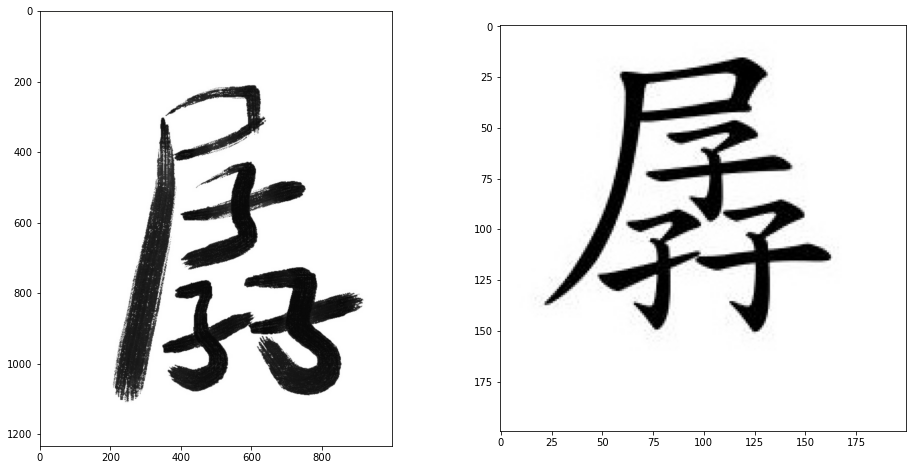

In [36]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

# read images
image1 = mpimg.imread(DIR_Amateur+"Amateur_0008.jpg")
image2 = mpimg.imread(DIR_profession+"profession (8).jpg")
#image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')



In [37]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

#sift


img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image8bit1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image8bit2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')



sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image8bit1,None)

keypoints_2, descriptors_2 = sift.detectAndCompute(image8bit2,None)

len(keypoints_1), len(keypoints_2)



(2271, 107)

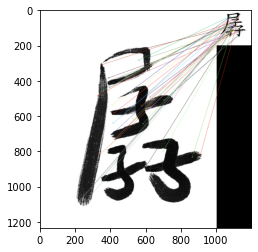

(<matplotlib.image.AxesImage at 0x25aa8608d60>, None)

In [39]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image8bit1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image8bit2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


#sift

sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image8bit1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image8bit2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches =sorted(matches, key=lambda x:x.distance)
img3 = cv2.drawMatches(image8bit1, keypoints_1, image8bit2, keypoints_2, matches[:50], image8bit2, flags=2)
plt.imshow(img3),plt.show()




Find the keypoints and descriptors with ORB
match descriptors and sort them in the order of their distance
extract the matched keypoints
find homography matrix and do perspective transform
img2
res


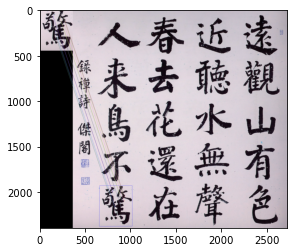

In [7]:


## Find object by orb features matching

import numpy as np
import cv2
imgname = "single.png"          # query image (small object)
imgname2 = "img1.png" # train image (large scene)

MIN_MATCH_COUNT = 4




## Create ORB object and BF object(using HAMMING)
orb = cv2.ORB_create()
img1 = cv2.imread(imgname)
img2 = cv2.imread(imgname2)

#img1 = mpimg.imread(DIR_Amateur+"Amateur_0008.jpg")
#img2 = mpimg.imread(DIR_profession+"profession (8).jpg")

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

## Find the keypoints and descriptors with ORB
kpts1, descs1 = orb.detectAndCompute(gray1,None)
kpts2, descs2 = orb.detectAndCompute(gray2,None)
print("Find the keypoints and descriptors with ORB")

## match descriptors and sort them in the order of their distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descs1, descs2)
dmatches = sorted(matches, key = lambda x:x.distance)
print("match descriptors and sort them in the order of their distance")


## extract the matched keypoints
src_pts  = np.float32([kpts1[m.queryIdx].pt for m in dmatches]).reshape(-1,1,2)
dst_pts  = np.float32([kpts2[m.trainIdx].pt for m in dmatches]).reshape(-1,1,2)
print("extract the matched keypoints")


## find homography matrix and do perspective transform
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
print("find homography matrix and do perspective transform")

## draw found regions
img2 = cv2.polylines(img2, [np.int32(dst)], True, (0,0,255), 1, cv2.LINE_AA)

#plt.imshow(img2)
print("img2")

## draw match lines
res = cv2.drawMatches(img1, kpts1, img2, kpts2, dmatches[:20],None,flags=2)

plt.imshow(res)
print("res")


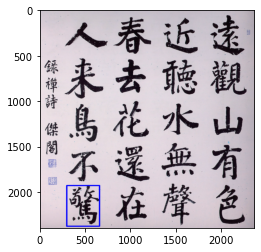

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('img1.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('single.png',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
plt.imshow(img_rgb)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 29
Total Keypoints without nonmaxSuppression: 29


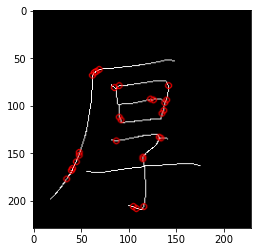

In [113]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('ske_img3.png',0) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#plt.figure(figsize = (200,10))


#plt.imshow(img2)

#cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(100000)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

#plt.figure(figsize = (200,10))


plt.imshow(img3)

691


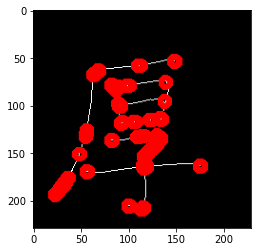

In [115]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def harris_corner_detection( f ):
    #print("aaa")
    g = cv2.cvtColor( f, cv2.COLOR_GRAY2BGR )
    nr, nc = f.shape[:2]
    gray = np.float32( f )
    dst = cv2.cornerHarris( gray, 2, 3, 0.04 )
    dst = cv2.dilate(dst,None)

    ##########
        

    #print(dst)
    count = 0 
    for x in range( nr ):
        for y in range( nc ):
            if dst[x,y] > 0.1 * dst.max():
                count+=1
                cv2.circle( g, (y,x), 5, [255,0,0], 2 )
    thresh = 0.01*dst.max()
    
    
    
    
    #g[dst>thresh]=[0,255,0]
    print(count)
    
    
        # Create list of thresholds:
    #thresh = [130, 110, 40]


    return g
    
def main( ):
    #img1 = cv2.imread(DIR_kai+"0_word_img (1231).jpg",0) 
    img1 = cv2.imread( "ske_img3.png", 0 )
    
    img2 = harris_corner_detection( img1 )
    #plt.figure(figsize = (200,10))
    image_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(image_img1 )
    #plt.figure(figsize = (200,10))
    plt.imshow(img2 )

main( )

In [116]:
import cv2
import numpy as np

# image path
fileName = "ske_img3.png"

# Reading an image in default mode:
inputImage = cv2.imread(fileName)
inputImageCopy = inputImage.copy()

# Convert to grayscale:
grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

# Compute the skeleton:
skeleton = cv2.ximgproc.thinning(grayscaleImage, None, 1)

# Threshold the image so that white pixels get a value of 10 and
# black pixels a value of 0:
_, binaryImage = cv2.threshold(skeleton, 128, 10, cv2.THRESH_BINARY)

# Set the convolution kernel:
h = np.array([[1, 1, 1],
              [1, 10, 1],
              [1, 1, 1]])

# Convolve the image with the kernel:
imgFiltered = cv2.filter2D(binaryImage, -1, h)

In [117]:
# Create list of thresholds:
thresh = [130, 110, 40]

# Prepare the final mask of points:
(height, width) = binaryImage.shape
pointsMask = np.zeros((height, width, 1), np.uint8)

# Perform convolution and create points mask:
for t in range(len(thresh)):
    # Get current threshold:
    currentThresh = thresh[t]
    # Locate the threshold in the filtered image:
    tempMat = np.where(imgFiltered == currentThresh, 255, 0)
    # Convert and shape the image to a uint8 height x width x channels
    # numpy array:
    tempMat = tempMat.astype(np.uint8)
    tempMat = tempMat.reshape(height,width,1)
    # Accumulate mask:
    pointsMask = cv2.bitwise_or(pointsMask, tempMat)
cv2.imshow("Circles", pointsMask)
cv2.waitKey(0)

-1

In [118]:
# Set kernel (structuring element) size:
kernelSize = 3
# Set operation iterations:
opIterations = 4
# Get the structuring element:
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
# Perform Dilate:
pointsMask = cv2.morphologyEx(pointsMask, cv2.MORPH_DILATE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

True

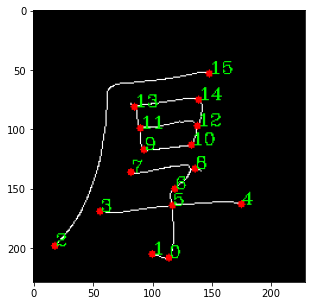

In [123]:
# Look for the outer contours (no children):
contours, _ = cv2.findContours(pointsMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Store the points here:
pointsList = []

# Loop through the contours:
for i, c in enumerate(contours):

    # Get the contours bounding rectangle:
    boundRect = cv2.boundingRect(c)

    # Get the centroid of the rectangle:
    cx = int(boundRect[0] + 0.5 * boundRect[2])
    cy = int(boundRect[1] + 0.5 * boundRect[3])

    # Store centroid into list:
    pointsList.append( (cx,cy) )

    # Set centroid circle and text:
    color = (0, 0, 255)
    cv2.circle(inputImageCopy, (cx, cy), 3, color, -1)
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(inputImageCopy, str(i), (cx, cy), font, 0.5, (0, 255, 0), 1)

    # Show image:
plt.figure(figsize = (100,5))
image_inputImageCopy = cv2.cvtColor(inputImageCopy, cv2.COLOR_BGR2RGB)

plt.imshow(image_inputImageCopy)
cv2.imwrite("out.png", image_inputImageCopy)


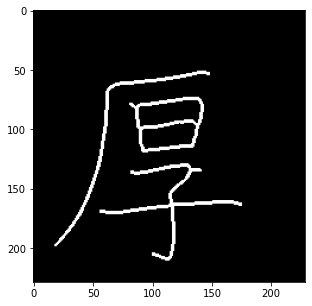

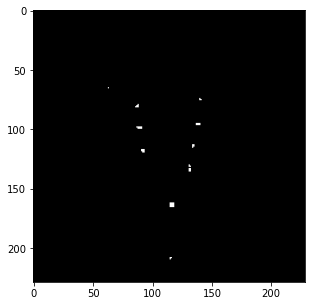

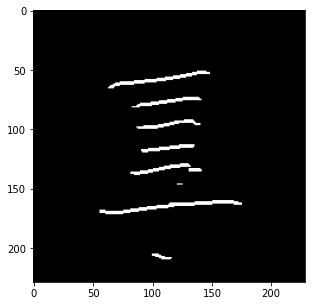

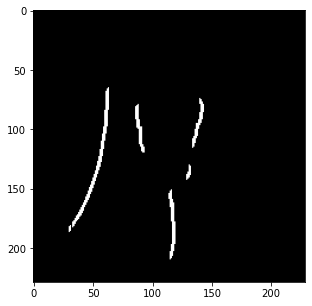

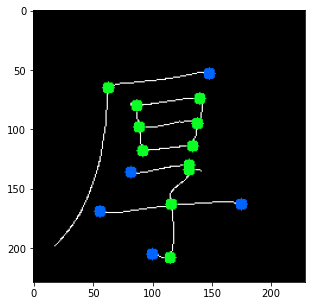

In [122]:
import cv2
import numpy as np
fileName = "ske_img3.png"

# Load image, grayscale, Gaussian blur, Otsus threshold
image = cv2.imread(fileName)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Find horizonal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

# Find vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)

# Find joint intersections then the centroid of each joint
joints = cv2.bitwise_and(horizontal, vertical)
cnts = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    # Find centroid and draw center point
    x,y,w,h = cv2.boundingRect(c)
    centroid, coord, area = cv2.minAreaRect(c)
    cx, cy = int(centroid[0]), int(centroid[1])
    cv2.circle(image, (cx, cy), 5, (36,255,12), -1)

# Find endpoints
corners = cv2.goodFeaturesToTrack(thresh, 5, 0.5, 10)
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 5, (255,100,0), -1)
    
thresh_img = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
joints_img = cv2.cvtColor(joints, cv2.COLOR_BGR2RGB)
horizontal_img = cv2.cvtColor(horizontal, cv2.COLOR_BGR2RGB)
vertical_img = cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB)
image_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (100,5))
plt.imshow(thresh_img)
plt.figure(figsize = (100,5))
plt.imshow(joints_img)
plt.figure(figsize = (100,5))
plt.imshow(horizontal_img)
plt.figure(figsize = (100,5))
plt.imshow(vertical_img)
plt.figure(figsize = (100,5))
plt.imshow(image_img)


example here:
Threshold = 131.0


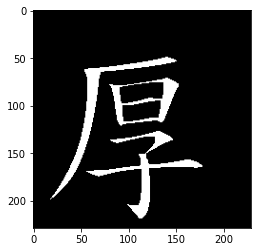

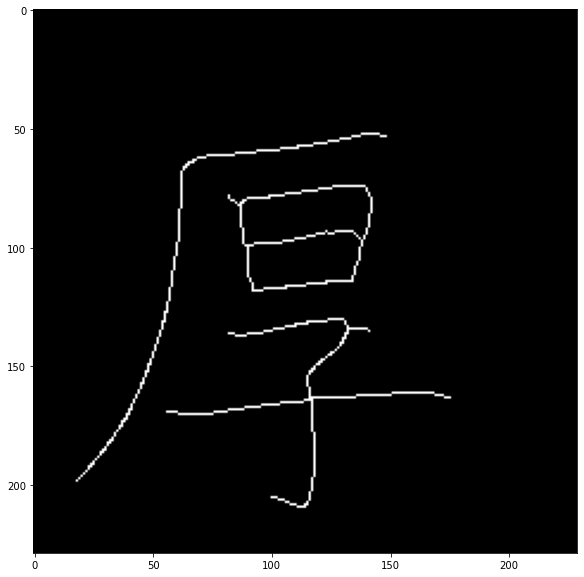

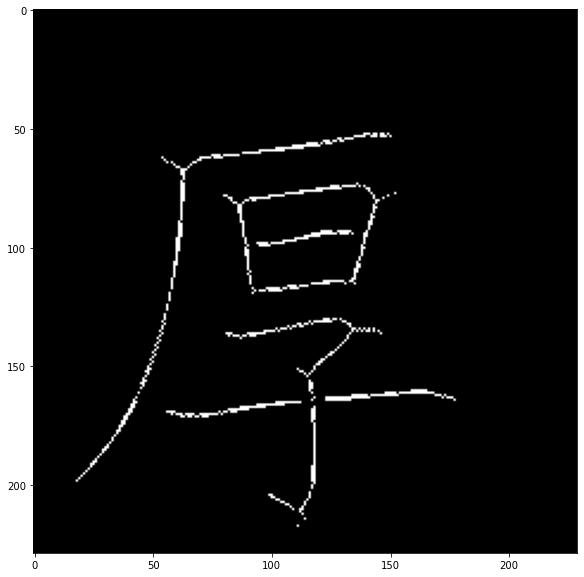

In [108]:
import cv2
import numpy as np
import imutils

img = cv2.imread("out3.png",0)



#img1 = cv2.imread(DIR_black+'/令.png', 0 )
thresh, img2 = cv2.threshold( img, 127, 255, 
               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
print("example here:")
print( "Threshold =", thresh )
#cv2.imshow( "Original Image",  img2 )	
#cv2.waitKey( 0 )

plt.figure("Correct")
plt.imshow(imutils.opencv2matplotlib(img2))
plt.show()

img2 = cv2.cvtColor(img2, cv2.IMREAD_GRAYSCALE)


size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
#img2 = cv2.imread("out2.png")
thinned = cv2.ximgproc.thinning(cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY))

ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True


plt.figure(figsize = (200,10))
cv2.imwrite("ske_img3.png",thinned)
thinned = cv2.cvtColor(thinned, cv2.COLOR_BGR2RGB)
plt.imshow(thinned)

plt.figure(figsize = (200,10))
skel = cv2.cvtColor(skel, cv2.COLOR_BGR2RGB)
plt.imshow(skel)

